In [1]:
import pandas as pd
from scipy.stats import t
import math
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Laptop T&T\Documents\national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset\NHANES_age_prediction.csv')

In [3]:
x = df['RIDAGEYR']
y = df['BMXBMI']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     50.38
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.68e-12
Time:                        07:26:57   Log-Likelihood:                -7719.3
No. Observations:                2278   AIC:                         1.544e+04
Df Residuals:                    2276   BIC:                         1.545e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7431      0.346     74.407      0.000      25.065      26.422
RIDAGEYR       0.0529      0.007      7.098      0.000       0.038       0.068
==============================================================================
Omnibus:                      625.699   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1732.108
Skew:                           1.434   Prob(JB):                         0.00
Kurtosis:                       6.166   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# H0: ρ = 0
# H1: ρ ≠ 0

print('Critical value:', t.isf(0.025, 2276))
print('Test statistic:', 0.1483/math.sqrt((1-0.1483**2)/2276))

# => Reject H0

Critical value: 1.961006828053873
Test statistic: 7.154120878335977


In [5]:
#calculate SSe
sse = np.sum((model.predict(x) - y)**2)

#calculate squared sigma_hat

sse/2276

51.43201400117817

In [6]:
ypred = model.predict(x)
rmse = rmse(ypred, y)
rmse

7.168462777291406

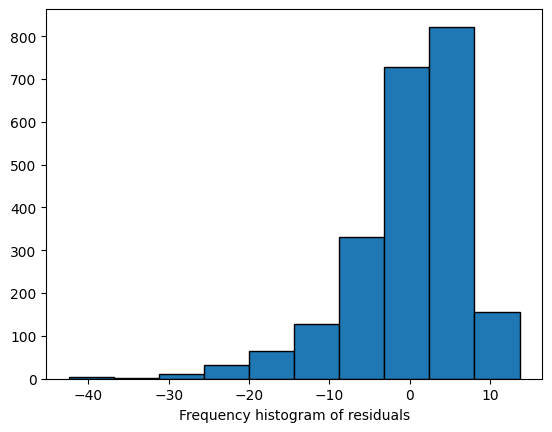

In [7]:
plt.hist(model.predict(x) - y, edgecolor = "black")
plt.xlabel('Frequency histogram of residuals')
plt.show()

C:\Users\Laptop T&T\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Laptop T&T\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Laptop T&T\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Laptop T&T\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_

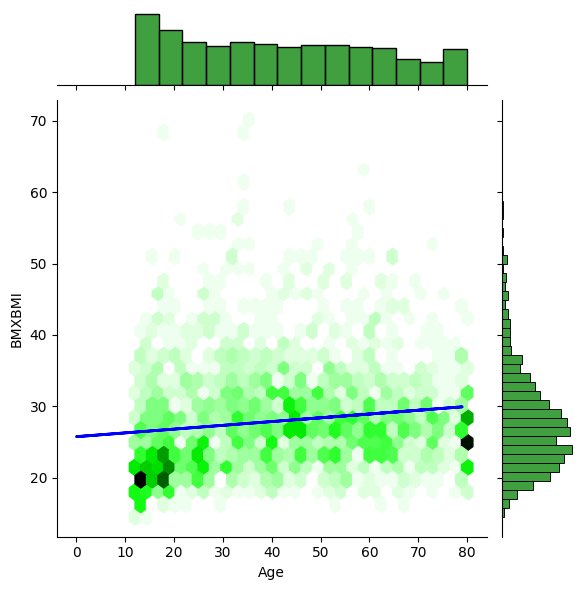

In [8]:
x = df['RIDAGEYR']
y = df['BMXBMI']
sns.jointplot(x=x, y=y, kind='hex', color='green')
plt.xlabel('Age')
plt.ylabel('BMXBMI')
x = np.random.randint(0, 80, 1000)
y = 0.0529*x + 25.7431
plt.plot(x, y, c='blue', linewidth = '2')
plt.savefig('plot.png')
plt.show()